# 데이터의 기본적인 설명과 상태 확인

Kaggle 내에 존재하는 베이커리 데이터를 활용하여 데이터 분석을 진행하였고, 이에 대한 내용은 다음과 같다.

## About Dataset

### Context
We live in the era of e-commerce and digital marketing. We have even small scale businesses going online as the opportunities are endless. Since a huge chunk of the people who have access to internet is switching to online shopping, large retailers are actively searching for ways to increase their profit. Market Basket analysis is one such key techniques used by large retailers to to increase sales by understanding the customers' purchasing behavior & patterns. Market basket analysis examines collections of items to find relationships between items that go together within the business context.

### Content
The dataset belongs to "The Bread Basket" a bakery located in Edinburgh. The dataset provide the transaction details of customers who ordered different items from this bakery online during the time period from 30-10-2016 to 09-04-2017. The dataset has 20507 entries, over 9000 transactions, and 4 columns.

### Variables
- `TransactionNo` : unique identifier for every single transaction
- `Items` : items purchased
- `DateTime` : date and time stamp of the transactions
- `Daypart` : part of the day when a transaction is made (morning, afternoon, evening, night)
- `DayType` : classifies whether a transaction has been made in weekend or weekdays

### Inspiration
The dataset is ideal for anyone looking to practice association rule mining and understand the business context of data mining for better understanding of the buying pattern of customers.

번역본은 다음과 같다.

### 배경
우리는 전자상거래와 디지털 마케팅의 시대에 살고 있습니다. 온라인의 기회가 무궁무진하기 때문에 소규모 사업체조차 온라인으로 진출하고 있습니다. 인터넷 접근성이 높은 사람들의 상당 부분이 온라인 쇼핑으로 전환하면서 대형 소매업체들은 수익 증대를 위한 방법을 적극적으로 모색하고 있습니다. 장바구니 분석은 고객의 구매 행동 및 패턴을 이해하여 매출을 늘리는 데 사용되는 핵심 기술 중 하나입니다. 장바구니 분석은 품목의 모음을 조사하여 비즈니스 맥락 내에서 함께 구매되는 품목 간의 관계를 파악합니다.

### 내용
이 데이터셋은 에든버러에 위치한 "The Bread Basket"이라는 빵집의 것입니다. 이 데이터셋은 2016년 10월 30일부터 2017년 4월 9일까지 온라인으로 이 빵집에서 다양한 품목을 주문한 고객들의 거래 내역을 제공합니다. 이 데이터셋은 20507개의 항목, 9000건 이상의 거래, 그리고 4개의 열로 구성되어 있습니다.

### 변수
- `TransactionNo`: 각 거래에 대한 고유 식별자
- `Items`: 구매한 품목
- `DateTime`: 거래의 날짜 및 시간 스탬프
- `Daypart`: 거래가 이루어진 시간대 (아침, 오후, 저녁, 밤)
- `DayType`: 거래가 주말에 이루어졌는지 평일에 이루어졌는지 분류

### 영감
이 데이터셋은 연관 규칙 마이닝을 연습하고 고객의 구매 패턴에 대한 더 나은 이해를 위해 데이터 마이닝의 비즈니스 맥락을 이해하고자 하는 모든 사람에게 이상적입니다.

## 의존성 라이브러리 import

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, pointbiserialr

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

import math

## 데이터 불러오기

In [301]:
df = pd.read_csv('./data/bakery_sales_revised.csv')

In [303]:
display(df.head())

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,10/30/2016 9:58,morning,weekend
1,2,Scandinavian,10/30/2016 10:05,morning,weekend
2,2,Scandinavian,10/30/2016 10:05,morning,weekend
3,3,Hot chocolate,10/30/2016 10:07,morning,weekend
4,3,Jam,10/30/2016 10:07,morning,weekend


## 기본 통계량 확인

In [306]:
# 기본 통계량 (데이터의 크기, 타입, 결측치, describe 내용 확인) 출력 함수
def basic_information(df):
    print(f'data shape : {df.shape}')
    
    basic_info_df = pd.DataFrame(data=df.dtypes, columns=['dtypes'])
    basic_info_df['missing'] = df.isnull().sum().values
    basic_info_df['missing_rate (%)'] = df.isnull().sum().values / len(df) * 100
    basic_info_df['nunique'] = df.nunique().values

    # describe 통계량 (수치형/범주형 포함)
    desc_df = df.describe(include='all').transpose()

    # 수치형 항목만 해당되는 통계량 추가
    for col in ['mean', 'std', 'min','25%', '50%', '75%', 'max']:
        if col in desc_df.columns:
            basic_info_df[col] = desc_df[col]

    # 최빈값 및 해당 최빈값의 count
    basic_info_df['mode'] = {col: df[col].mode(dropna=True).iloc[0] if not df[col].mode(dropna=True).empty else None for col in df.columns}
    basic_info_df['mode_counts'] = {col: df[col].value_counts().max() if not df[col].value_counts().empty else 0 for col in df.columns}

    return basic_info_df

In [308]:
# 원본 데이터의 결측치, 기술 통계량 확인
display(basic_information(df))

data shape : (20507, 5)


,dtypes,missing,missing_rate (%),nunique,mean,std,min,25%,50%,75%,max,mode,mode_counts
Transaction,int64,0,0.0,9465,4976.20237,2796.203001,1.0,2552.0,5137.0,7357.0,9684.0,6279,11
Item,object,0,0.0,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee,5471
date_time,object,0,0.0,9182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/5/2017 11:58,12
period_day,object,0,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,afternoon,11569
weekday_weekend,object,0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekday,12807


각 컬럼들의 내용 살펴보면 다음과 같다.

데이터의 크기 : `(20507, 5)`

|컬럼|컬럼 설명|
|---|---|
|Transaction|거래내역|
|Item|구입한 아이템|
|datei_time|구입한 날짜|
|period_day|구입한 시간대|
|weekday_weekend|구입한 날이 평일인지 주말인지의 여부|

현재 다음과 같은 내용을 확인할 수 있었다.

- 결측치는 나타나지 않았다.
- 가장 많이 팔린 아이템은 Coffee이며 총 5471건이 팔렸다.
- 가장 많이 팔린 날은 2017년 5월 2일 11시 58분에 많이 팔렸다.
- 가장 많이 팔린 시간대는 오후 시간대인 afternoon에 많이 팔렸다.
- 평일날에 많은 판매건을 보유하고 있다.

# 데이터 중복값 처리

현재 이 데이터가 kaggle에서 장바구니 분석을 통한 데이터 분석을 많이 하기에 장바구니 분석을 실시하고자 하였다.<br/>
이 데이터를 활용한 여러 개의 kaggle notebook를 보면서 다음과 같은 궁금증을 갖게 되었다.

### ___"Q.장바구니 분석을 할 때 중복값을 처리하는 이유가 어떻게 되는가?"___

> #### 1. 아이템 간 관계의 왜곡 방지
>    - 예 : 고객 A가 같은 상품을 한 장바구니에 5개 담았다고 해서, 그 상품이 다른 상품과 "더 많이 연관되어 있다" 고 판단하는 건 과장된 해석이 될 수 있다.
>    - 대부분의 연관 규칙 분석은 아이템의 **존재 여부**만 따지기 때문에, 중복은 의미 없는 노이즈가 될 수 있다.
> #### 2. 정확한 규칙 도출
>    - Apriori나 FP-Growth같은 알고리즘은 support(지지도), confidence(신뢰도), lift(향상도) 등을 기준으로 규칙을 추출.
>    - 중복값이 포함되면 지지도 등이 왜곡되어 잘못된 규칙이 나올 수 있음.
> #### 3. 데이터의 일관성 유지
>    - 대부분의 장바구니 분석은 한 거래(트랜잭션)에서 어떤 제품이 포함되었는지에만 관심이 있다.
>    - 따라스 같은 제품이 여러 번 등장하면 중복 제거를 통해 트랜잭션을 "집합(set)"으로 변환하는 것이 일반적.
> #### 4. 분석 성능 향상
>    - 중복값이 많으면 데이터의 크기가 커지고, 연산량도 늘어나서 알고리즘 성능이 저하될 수 있다.
>    - 불필요한 데이터 제거는 처리 시간을 절약하고 결과 해석에 용이하다.

In [313]:
# 원본 데이터 유지
df_original_1 = df.copy()

# 데이터 중복값 처리
df.drop_duplicates(inplace=True)

# 데이터 확인
display(df.head())

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,10/30/2016 9:58,morning,weekend
1,2,Scandinavian,10/30/2016 10:05,morning,weekend
3,3,Hot chocolate,10/30/2016 10:07,morning,weekend
4,3,Jam,10/30/2016 10:07,morning,weekend
5,3,Cookies,10/30/2016 10:07,morning,weekend


In [315]:
# 데이터의 기본 통계량 확인
display(basic_information(df))

data shape : (18887, 5)


,dtypes,missing,missing_rate (%),nunique,mean,std,min,25%,50%,75%,max,mode,mode_counts
Transaction,int64,0,0.0,9465,4951.051517,2811.619306,1.0,2496.5,5082.0,7378.5,9684.0,9447,10
Item,object,0,0.0,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee,4528
date_time,object,0,0.0,9182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/5/2017 17:22,10
period_day,object,0,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,afternoon,10687
weekday_weekend,object,0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekday,11830


- 중복값을 삭제하였더니 기존에 있던 20507건에서 18887건이 삭제되었다.

# 데이터 date_time 컬럼 각 연/월/별/시/분 으로 나누기

데이터 EDA를 할 때 각 시간대 별로 편하게 EDA 작업을 하기 위함.

In [320]:
# 이전 작업 데이터 원본 유지
df_original_2 = df.copy()

# 변환 함수
def datetime_func(df):
    # date_time 컬럼을 datetime으로 변경
    df.rename(columns={'date_time' : 'datetime'}, inplace=True)

    # datetime 컬럼을 datetime으로 형변환
    df['datetime'] = pd.to_datetime(df['datetime'])

    # 형변환된 datetime을 각각 연/월/별/시/분/요일로 나누기
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute
    df['day_of_week'] = df['datetime'].dt.day_of_week

    # datetime 컬럼 삭제
    df.drop(labels='datetime', axis=1, inplace=True)

    return df

# 변환 함수 적용된 데이터 프레임 적용
df = datetime_func(df)

# 데이터 확인
display(df.head())

# 데이터 기술 통계량 확인
display(basic_information(df))

,Transaction,Item,period_day,weekday_weekend,year,month,day,hour,minute,day_of_week
0,1,Bread,morning,weekend,2016,10,30,9,58,6
1,2,Scandinavian,morning,weekend,2016,10,30,10,5,6
3,3,Hot chocolate,morning,weekend,2016,10,30,10,7,6
4,3,Jam,morning,weekend,2016,10,30,10,7,6
5,3,Cookies,morning,weekend,2016,10,30,10,7,6


data shape : (18887, 10)


,dtypes,missing,missing_rate (%),nunique,mean,std,min,25%,50%,75%,max,mode,mode_counts
Transaction,int64,0,0.0,9465,4951.051517,2811.619306,1.0,2496.5,5082.0,7378.5,9684.0,9447,10
Item,object,0,0.0,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee,4528
period_day,object,0,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,afternoon,10687
weekday_weekend,object,0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekday,11830
year,int32,0,0.0,2,2016.597924,0.49033,2016.0,2016.0,2017.0,2017.0,2017.0,2017,11293
month,int32,0,0.0,7,5.906285,4.547793,1.0,2.0,3.0,11.0,12.0,11,4172
day,int32,0,0.0,31,15.089321,8.939228,1.0,7.0,15.0,23.0,31.0,4,953
hour,int32,0,0.0,18,12.276116,2.342972,1.0,10.0,12.0,14.0,23.0,11,2837
minute,int32,0,0.0,60,29.256367,17.535439,0.0,14.0,29.0,45.0,59.0,14,383
day_of_week,int32,0,0.0,7,3.358554,1.965361,0.0,2.0,4.0,5.0,6.0,5,4259


# 데이터 EDA

판매 수량에 대한 EDA 분석이기 때문에, 중복값 처리를 하지 않은 데이터를 토대로 작업을 진행하였다.

In [324]:
eda_df = datetime_func(df_original_1)

## 가장 많이 팔린 아이템 상위 20개

,Item,count
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
5,Sandwich,771
6,Medialuna,616
7,Hot chocolate,590
8,Cookies,540
9,Brownie,379


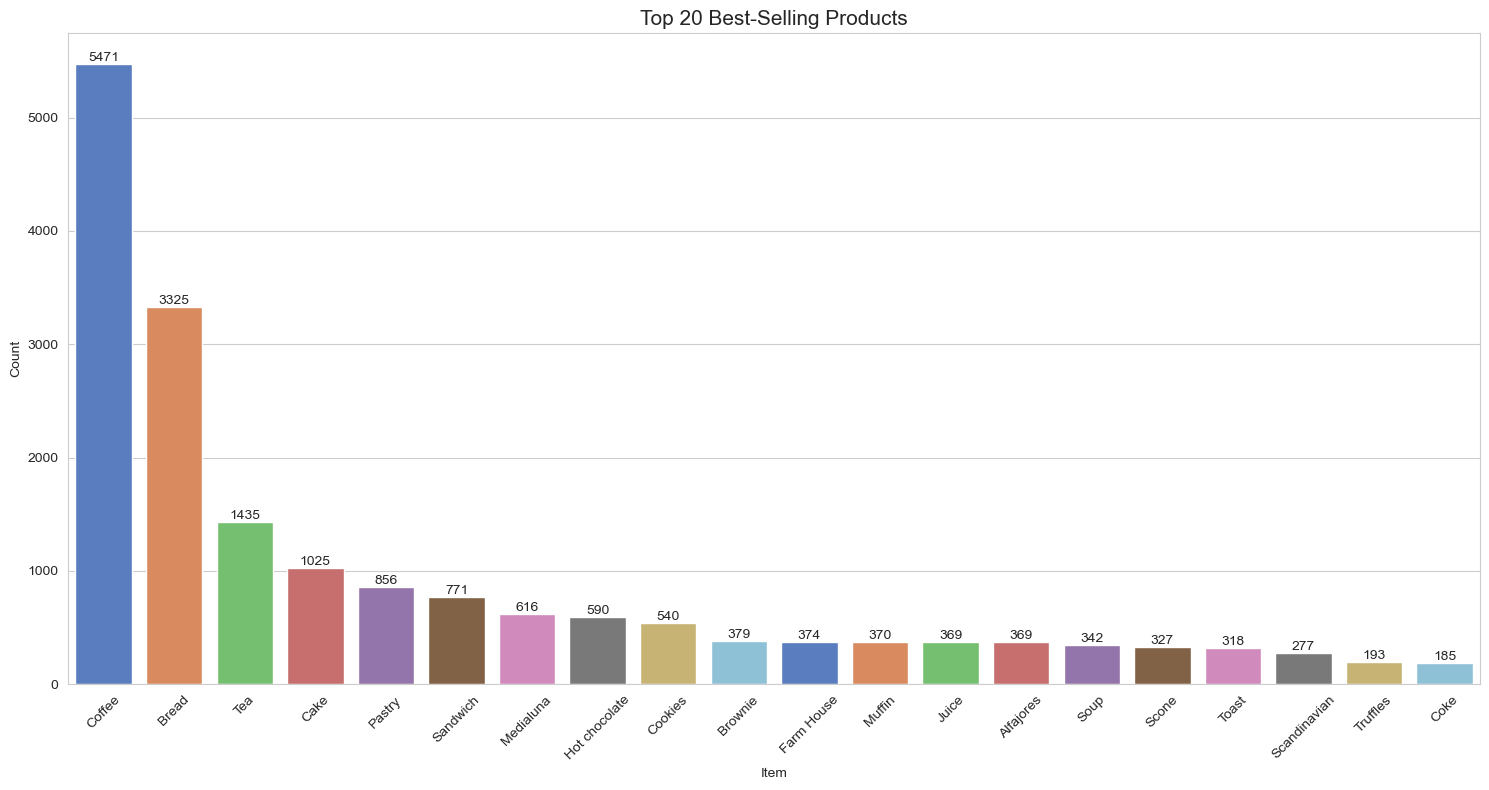

In [326]:
# Item 기준으로 groupby 후 내림차순 정렬
# 상위 20개만 출력
item_groupby_df = eda_df.groupby('Item').size().sort_values(ascending=False).reset_index(name='count').head(20)

# 데이터프레임 시각화
display(item_groupby_df)

# 시각화
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=item_groupby_df, x='Item', y='count', hue='Item', palette='muted', legend=False)
for i in ax.containers:
    ax.bar_label(i)

# 그래프 기본 설정
plt.title('Top 20 Best-Selling Products', size=15)
plt.xticks(rotation=45)
plt.xlabel('Item')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 월별 가장 많이 팔린 아이템 상위 5개 시각화

C:\Users\lento\AppData\Local\Temp\ipykernel_2464\2509829475.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_per_month = groupby_df.groupby('month').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


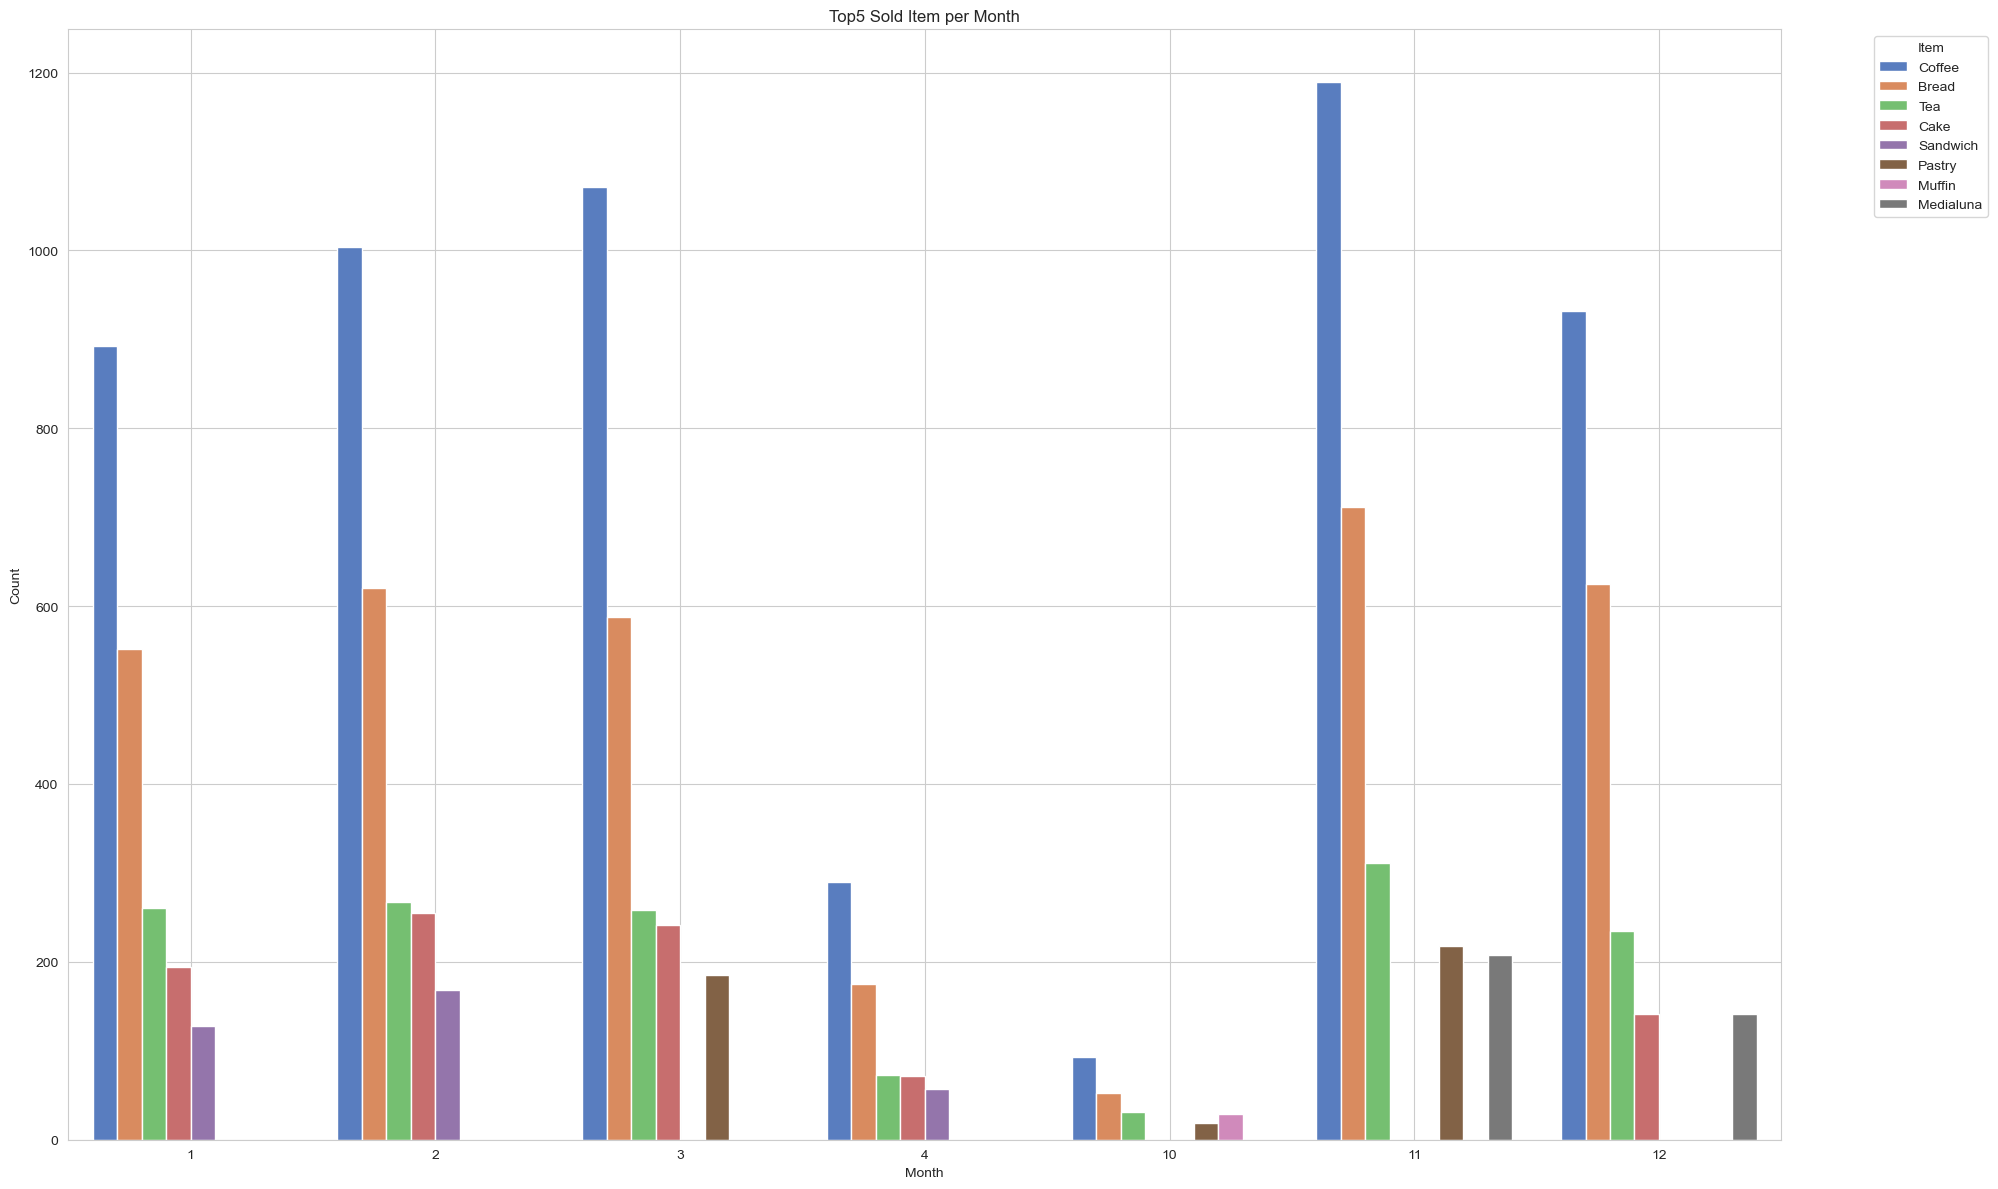

In [329]:
# month 컬럼을 기준으로 Item groupby
groupby_df = eda_df.groupby(['month', 'Item']).size().reset_index(name='count')

# 월별로 상위 5개 아이템 출력
# nlargest, nsmallest : 데이터를 오름차순/내림차순 정렬 후, 위에서 n개 행을 출력하는 메서드
top5_per_month = groupby_df.groupby('month').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# 데이터 시각화
plt.figure(figsize=(20, 12))

# barplot으로 데이터 시각화
sns.barplot(data=top5_per_month, x='month', y='count', hue='Item', palette='muted', dodge=True)

# 그래프 설정
plt.title('Top5 Sold Item per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## 시간대별 판매량 수

,period_day,count
0,afternoon,11569
1,morning,8404
2,evening,520
3,night,14


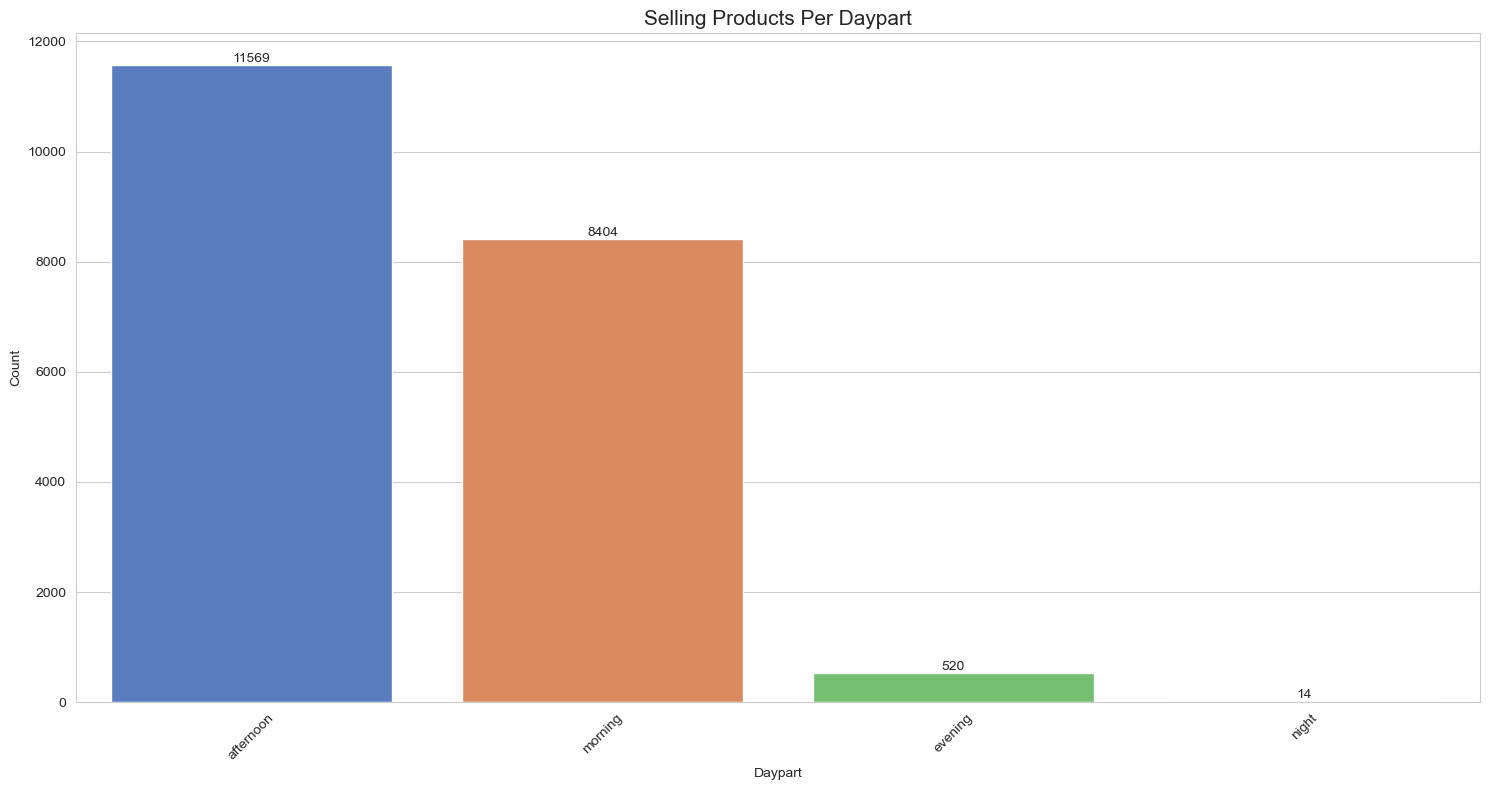

In [333]:
daypart_groupby_df = eda_df.groupby('period_day').size().sort_values(ascending=False).reset_index(name='count')

# 데이터프레임 시각화
display(daypart_groupby_df)

# 시각화
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=daypart_groupby_df, x='period_day', y='count', hue='period_day', palette='muted', legend=False)
for i in ax.containers:
    ax.bar_label(i)

# 그래프 기본 설정
plt.title('Selling Products Per Daypart', size=15)
plt.xticks(rotation=45)
plt.xlabel('Daypart')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 요일별 판매량 수

,index,count
0,Mon,2324
1,Tue,2392
2,Wed,2321
3,Thu,2646
4,Fri,3124
5,Sat,4605
6,Sun,3095


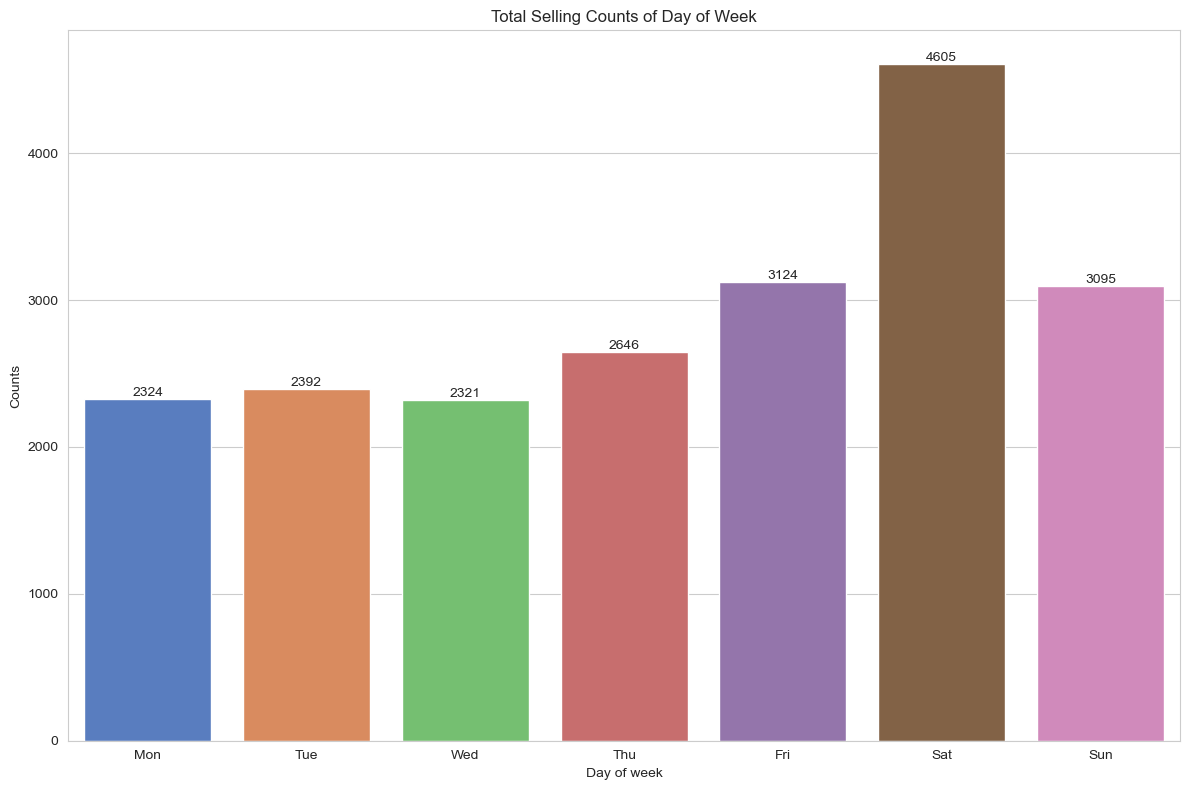

In [445]:
# day_of_week 컬럼의 value_counts함수 적용 후 index 기준 sort
dow_counts = eda_df['day_of_week'].value_counts().sort_index()

# index 컬럼명 변경
dow_counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# 데이터프레임 확인
display(dow_counts.reset_index(name='count'))

# 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=dow_counts.index, y=dow_counts.values, hue=dow_counts.index, palette='muted', legend=False)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Total Selling Counts of Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

## 시간대별 판매량

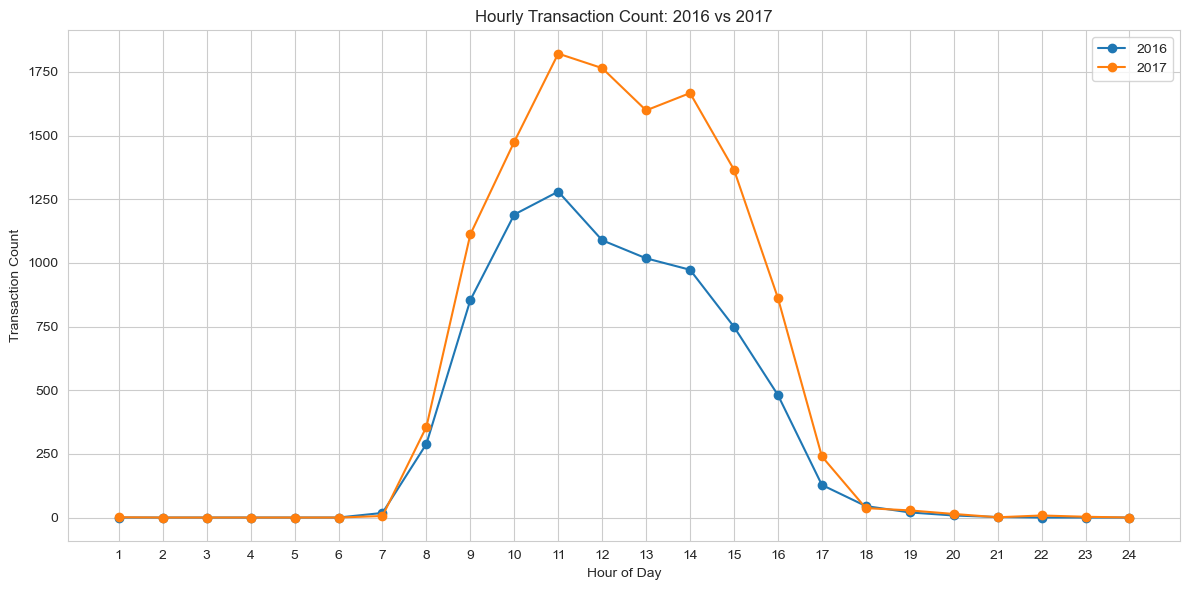

In [448]:
counts_2016 = eda_df[eda_df['year'] == 2016]['hour'].value_counts().sort_index()
counts_2017 = eda_df[eda_df['year'] == 2017]['hour'].value_counts().sort_index()

# x축 범위 (1시부터 24시)
x_range = range(1, 25)

# 빠진 시간은 0으로 채우기 (reindex)
counts_2016_full = counts_2016.reindex(x_range, fill_value=0)
counts_2017_full = counts_2017.reindex(x_range, fill_value=0)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(x_range, counts_2016_full, label='2016', marker='o')
plt.plot(x_range, counts_2017_full, label='2017', marker='o')

plt.title('Hourly Transaction Count: 2016 vs 2017')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.xticks(x_range)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 시간대별 요일별 주문 수

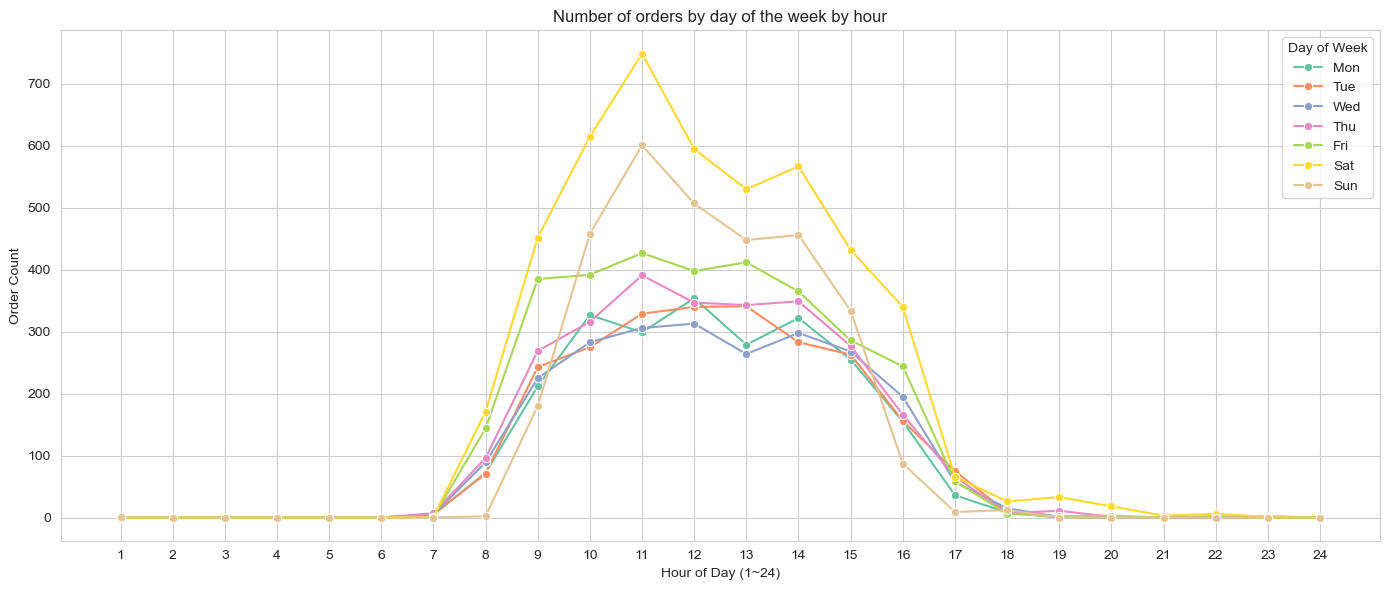

In [452]:
# 데이터 그룹화
eda_groupby_df = eda_df.groupby(['day_of_week', 'hour']).size().reset_index(name='count')

# 요일 숫자를 요일 이름으로 매핑 (주의: "Wen" → "Wed" 오타 수정)
eda_groupby_df['day_of_week'] = eda_groupby_df['day_of_week'].replace(
    [0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)

# 모든 조합 만들기 (요일 x 시간)
all_combinations = pd.MultiIndex.from_product(
    [eda_groupby_df['day_of_week'].unique(), range(1, 25)],
    names=['day_of_week', 'hour']
)

# 누락된 조합 채우기
eda_groupby_df = eda_groupby_df.set_index(['day_of_week', 'hour']).reindex(all_combinations, fill_value=0).reset_index()

# 그래프 그리기
plt.figure(figsize=(14, 6))
sns.lineplot(data=eda_groupby_df, x='hour', y='count', hue='day_of_week', palette='Set2', marker='o')
plt.title('Number of orders by day of the week by hour')
plt.xlabel('Hour of Day (1~24)')
plt.ylabel('Order Count')
plt.xticks(range(1, 25))
plt.legend(title='Day of Week')
plt.grid(True)
plt.tight_layout()
plt.show()

## Item과 날짜 간의 연관분석

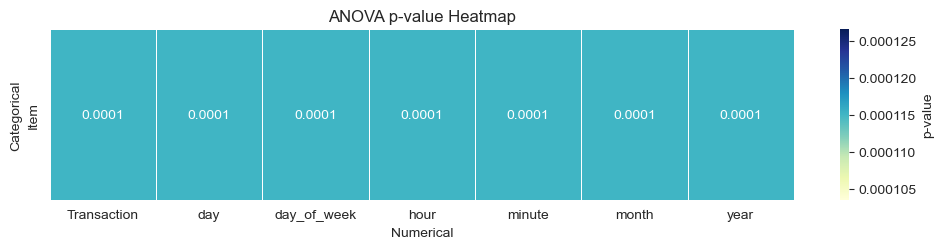

,Categorical,Numerical,Eta Squared,p-value
6,Item,day_of_week,0.642295,0.000115
1,Item,year,0.002357,0.000115
2,Item,month,0.002338,0.000115
0,Item,Transaction,0.001666,0.000115
5,Item,minute,0.000208,0.000115
3,Item,day,0.000113,0.000115
4,Item,hour,0.000012,0.000115


In [358]:
numeric_cols = eda_df.select_dtypes(['int', 'float']).columns

results = []

for num_col in numeric_cols:
    try:
        for category in [eda_df['Item'].dropna().unique()]:
            if len(groups) > 1:
                f_stat, p_val = f_oneway(*groups)

                # eta squared 계산
                model = ols(f'{num_col} ~ C({cat_col})', data=eda_df).fit()
                anova_table = anova_lm(model)
                eta_sq = anova_table['sum_sq'].iloc[0] / anova_table['sum_sq'].sum()

                results.append({
                    'Categorical': 'Item',
                    'Numerical': num_col,
                    'F-statistic': f_stat,
                    'p-value': p_val,
                    'Eta Squared': eta_sq
                })
    except Exception as e:
        print(f'Error processing {cat_col} vs {num_col}: {e}')

# 결과 DataFrame 생성
anova_df = pd.DataFrame(results)

# 히트맵용 피벗 테이블
anova_pivot = anova_df.pivot(index='Categorical', columns='Numerical', values='p-value')

# 히트맵 그리기
plt.figure(figsize=(10, len(anova_pivot) * 0.6 + 2))
sns.heatmap(anova_pivot, annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".4f", cbar_kws={'label': 'p-value'})
plt.title('ANOVA p-value Heatmap')
plt.tight_layout()
plt.show()

# eta squared 기준 정렬 결과 출력
eta_df = anova_df[['Categorical', 'Numerical', 'Eta Squared', 'p-value']].sort_values(by='Eta Squared', ascending=False)
display(eta_df)

# 장바구니 분석

장바구니 분석이란 고객의 구매 데이터에서 특정 상품들이 함께 구매되는 패턴을 찾아내는 연관성 분석 기법이다. 이를 통해 어떤 상품이 함꼐 구매될 가능성이 높은지 파악하여 매장 진열(제품 배치 최적화), 마케팅 전략, 고객 관계 관리(CRM) 등에 활용할 수 있다.

예시를 들면 다음과 같은 분야에 적용된다.

- **OTT 서비스** : 사용자의 시청 패턴을 분석하여 맞춤 콘텐츠를 추천
- **금융 기관** : 거래 패턴을 통해 사기 행위 탐지 및 맞춤 금융 상품 기획
- **의료 분야** : 환자의 증상 및 질병 패턴을 분석하여 예방 조치 마련
- **요식업계** : 인기 메뉴 조합을 찾아 세트 메뉴 개발

이에 맞게 각 거래 내역에서 중복 거래된 것들을 모두 중복 처리하고, 구입한 물건들의 내역들을 groupby하여 데이터프레임으로 출력한 결과 다음과 같이 출력이 되었다.

In [364]:
basket_df = df.groupby('Transaction')['Item'].agg(list).reset_index()
display(basket_df)

,Transaction,Item
0,1,[Bread]
1,2,[Scandinavian]
2,3,"[Hot chocolate, Jam, Cookies]"
3,4,[Muffin]
4,5,"[Coffee, Pastry, Bread]"
...,...,...
9460,9680,[Bread]
9461,9681,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9462,9682,"[Muffin, Tacos-Fajita, Coffee, Tea]"
9463,9683,"[Coffee, Pastry]"


이 데이터프레임을 pivot_table로 변환하여 다음과 같이 출력되도록 하였다.

In [366]:
te = TransactionEncoder()

te_result = te.fit_transform(basket_df['Item'])

te_df = pd.DataFrame(te_result, columns=te.columns_)

display(te_df)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


이렇게 pivot_table로 변환된 데이터프레임을 연관규칙 마이닝을 적용시키기로 하였다.

## 연관 규칙 마이닝이란?

연관 규칙 마이닝(Association Rule Mining)은 데이터에서 아이템 간의 상호 관련성을 분석하여 유의미한 정보를 추출하는 방법이다. 이 방법은 주로 장바구니 분석에서 사용되며, 규칙은 보통 “If (조건) Then (결과)” 의 형식으로 표현된다.

연관 규칙 마이닝에서 좋은 규칙을 찾기 위해서는 규칙의 가치를 평가하는 정량적인 지표가 필요한데, 다음과 같은 지표를 사용할 수 있다.

### 지지도(Support)

지지도는 특정 규칙이 얼마나 자주 발생하는지를 나타내는 지표로, 규칙의 일반성을 평가한다.

지지도가 높을수록 규칙이 데이터 내에서 빈벅하게 나타나며, 범용성이 높다고 해석할 수 있다.

지지도의 수식은 다음과 같다.

$$
Support(X \Rightarrow Y) = \frac{N(X \cap Y)}{N}
$$

### 신뢰도(Confidence)

신뢰도는 규칙의 신뢰성을 평가하는 지표로, X를 구매한 사람 중 Y도 함께 구매한 비율을 나타낸다.

신뢰도가 높을수록 규칙이 더 믿을만하며, 추천의 방향성도 결정할 수 있게 된다.

신뢰도의 수식은 다음과 같다.

$$
Confidence(X \Rightarrow Y) = \frac{N(X \cap Y)}{N(X)}
$$

### 향상도(Lift)

두 항목의 관계가 정말로 유의미한지, 또는 단순히 우연에 의한 것인지 평가하는데 사용하는 지표이다.

향상도는 X를 구매하는 것이 Y를 구매할 확률에 얼마나 영향을 미치는지 측정한다.

향상도의 수식은 다음과 같다.

$$
Lift(X \Rightarrow Y) = \frac{N(X \cap Y) \times N}{N(X) \times N(Y)}
$$

연관 규칙 마이닝에서 가장 중요하게 해석되는 지표는 **향상도**이며, 왜 향상도가 중요하게 활용되는 이유는 다음과 같다.

1. **실질적인 연관성 파악**: 지지도나 신뢰도만으로는 우연히 함께 자주 나타나는 품목들을 실제 연관성이 높은 품목으로 오해할 수 있다. 향상도는 이러한 우연적인 동시 발생을 보정하여 **의미 있는 연관성**을 파악하는 데 도움을 준다.
2. **불필요한 규칙 제거**: 향상도가 1에 가까운 규칙은 품목 간에 연관성이 없다는 것을 의미한다. 따라서 향상도 값이 낮은 규칙들은 마케팅 전략 수립에 실질적인 도움이 되지 않으므로 분석 대상에서 제외할 수 있다.
3. **교차판매 및 추천 전략** : 향상도가 높은 품목들을 함께 진열하거나, 특정 품목을 구매한 고객에게 다른 품목을 추천하는 등의 전략을 수립하는 데 유용한 정보를 제공한다. 예를 들어, ‘빵’을 구매한 고객에게 ‘잼’의 향상도가 높다면 함께 추천하는 것이 효과적일 수 있다.
4. **데이터의 희소성 문제 완화** : 특정 품목들의 동시 구매 빈도가 낮더라도, 각 품목의 개별 구매 빈도를 고려하여 의미 있는 연관성을 포착할 수 있다.

물론 향상도만으로 모든 것을 판단할 수는 없다. 그러므로 지지도와 신뢰도와 함께 고려하여 비즈니스 상황에 맞는 최적의 규칙을 찾아내는 것이 중요하다.

## FP-Growth를 통한 자주 등장하는 아이템셋 찾기

`min_support` 수치는 데이터 내에서 자동으로 추천을 받기 위해 다음과 같은 함수를 만들었다.

In [400]:
def recommend_min_support(frequent_itemsets, total_transactions, min_count_threshold=50, quantile_threshold=0.75):
    """
    frequent_itemsets: fpgrowth 결과 (support 포함된 DataFrame)
    total_transactions: 전체 거래 수
    min_count_threshold: 최소 등장 횟수 기준 (예: 50건 이상)
    quantile_threshold: 등장 횟수의 상위 퍼센트 기준 (예: 상위 25% 이상만 분석하고 싶을 때)

    반환값:
        - 추천 min_support (지지도 값)
        - 기준에 맞는 itemsets 수
    """
    # 등장 건수 계산
    frequent_itemsets = frequent_itemsets.copy()
    frequent_itemsets['support_count'] = frequent_itemsets['support'] * total_transactions

    # 등장 횟수 기준 필터링
    above_min_count = frequent_itemsets[frequent_itemsets['support_count'] >= min_count_threshold]
    min_support_from_count = min_count_threshold / total_transactions

    # 상위 퍼센트 기준 필터링
    threshold_count = frequent_itemsets['support_count'].quantile(quantile_threshold)
    min_support_from_quantile = threshold_count / total_transactions

    print(f"기준1: 최소 {min_count_threshold}건 이상 등장하려면 min_support ≥ {min_support_from_count:.4f}")
    print(f"기준2: 상위 {int((1 - quantile_threshold) * 100)}% 아이템셋 기준 min_support ≥ {min_support_from_quantile:.4f}")

    return {
        'min_support_by_count': round(min_support_from_count, 4),
        'min_support_by_quantile': round(min_support_from_quantile, 4),
        'frequent_itemsets_over_count': len(above_min_count),
        'total_itemsets': len(frequent_itemsets)
    }

In [406]:
# 먼저 fpgrowth를 아주 낮은 값으로 실행해서 전체 분포 확보
frequent_itemsets = fpgrowth(te_df, min_support=0.001, use_colnames=True)

# 추천 받기
# 데이터 내에서 전체 거래건수는 9684건
recommend_min_support(frequent_itemsets, total_transactions=9684, min_count_threshold=50, quantile_threshold=0.75)

기준1: 최소 50건 이상 등장하려면 min_support ≥ 0.0052
기준2: 상위 25% 아이템셋 기준 min_support ≥ 0.0049


{'min_support_by_count': 0.0052,
 'min_support_by_quantile': 0.0049,
 'frequent_itemsets_over_count': 112,
 'total_itemsets': 471}

상위 25% 아이템셋을 뽑아내어 규칙을 찾아보기 위해 `min_support` 값을 0.0049로 지정하여 출력하였다.

In [413]:
# 상위 25% 아이템셋 기준으로 데이터 출력
recommanded_frequent_itemsets = fpgrowth(te_df, min_support=0.0049, use_colnames=True)

# 데이터 출력
display(recommanded_frequent_itemsets.head(5), recommanded_frequent_itemsets.shape)

,support,itemsets
0,0.327205,(Bread)
1,0.029054,(Scandinavian)
2,0.058320,(Hot chocolate)
3,0.054411,(Cookies)
4,0.015003,(Jam)


(116, 2)

,support,itemsets
6,0.478394,(Coffee)
0,0.327205,(Bread)
9,0.142631,(Tea)
18,0.103856,(Cake)
37,0.090016,"(Coffee, Bread)"
7,0.086107,(Pastry)
21,0.071844,(Sandwich)
8,0.061807,(Medialuna)
2,0.058320,(Hot chocolate)
83,0.054728,"(Coffee, Cake)"


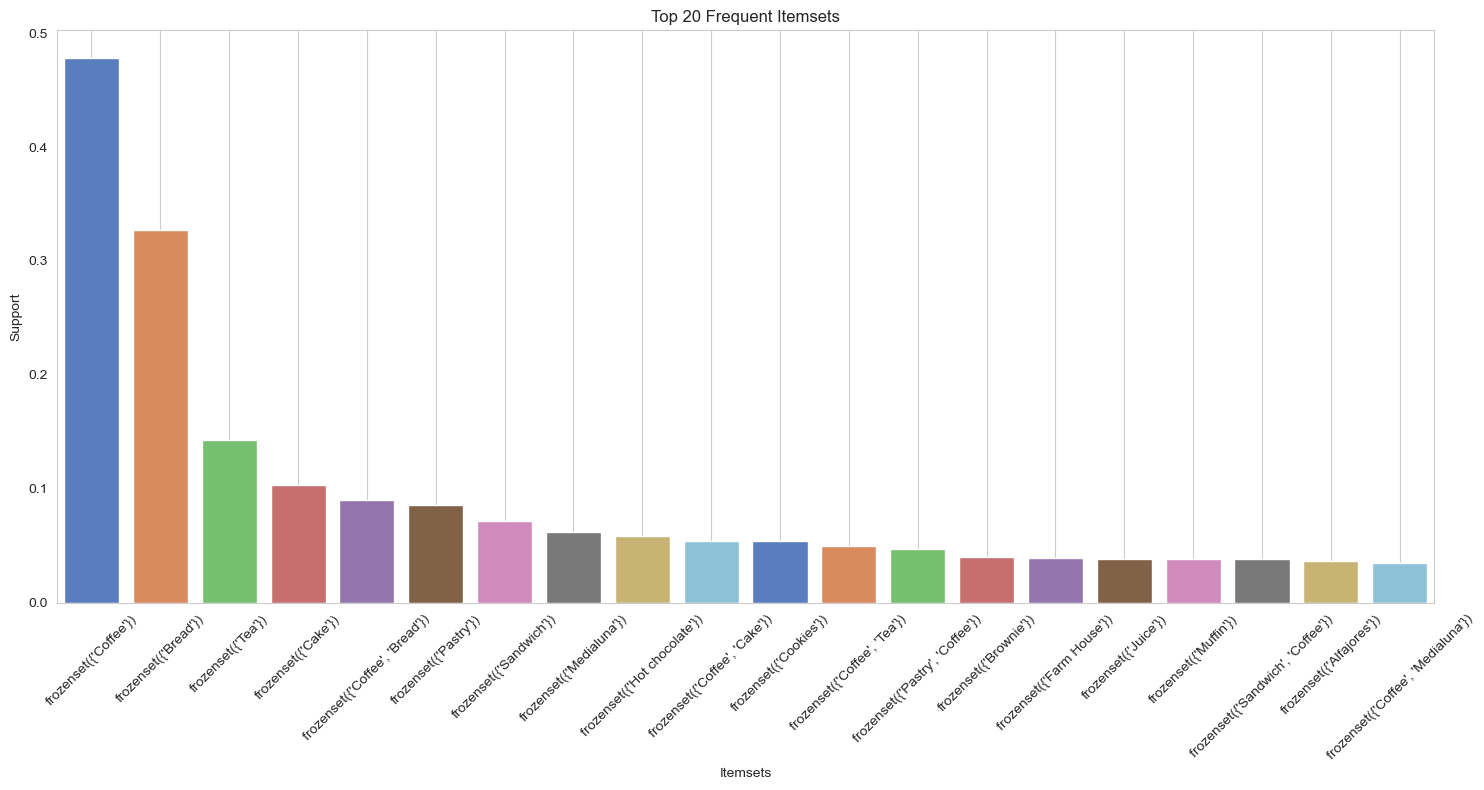

In [419]:
# 총 116r건 중, 상위 20개만 뽑아내여 시각화
top20_frequent_itemsets = recommanded_frequent_itemsets.sort_values(by='support', ascending=False).head(20)

# 데이터프레임 시각화
display(top20_frequent_itemsets)

# 시각화
plt.figure(figsize=(15, 8))
sns.barplot(data=top20_frequent_itemsets, x='itemsets', y='support', hue='itemsets', palette='muted', legend=False)
plt.title('Top 20 Frequent Itemsets')
plt.xticks(rotation=45)
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.grid()
plt.tight_layout()
plt.show()

## 연관 규칙 마이닝 적용

각각 support, confidence, lift를 적용시켜 높은 값들을 차례로 출력하여 데이터를 출력하였다.

In [423]:
# 전체 연관규칙 도출 (우선 lift 기준으로 최소 임계값은 1 정도 추천)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# 지지도 기준 필터링
rules_support = rules.sort_values(by='support', ascending=False)

# 신뢰도 기준 필터링
rules_confidence = rules.sort_values(by='confidence', ascending=False)

# 향상도 기준 필터링
rules_lift = rules.sort_values(by='lift', ascending=False)

In [431]:
print("지지도(support) 기준 Top 규칙")
display(rules_support.head(10))

print("신뢰도(confidence) 기준 Top 규칙")
display(rules_confidence.head(10))

print("[3] 향상도(lift) 기준 Top 규칙")
display(rules_lift.head(10))

지지도(support) 기준 Top 규칙


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
427,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
426,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,1.0,0.005044,1.011905,0.176684,0.103745,0.011765,0.320679
163,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,1.0,0.006351,1.014740,0.256084,0.091968,0.014526,0.325764
162,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
474,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
475,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,1.0,0.003877,1.008807,0.194321,0.074701,0.008731,0.306150
182,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,1.0,0.005614,1.012667,0.305936,0.069665,0.012509,0.321387
183,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
6,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,1.0,0.001683,1.003749,0.109048,0.058333,0.003735,0.284542
7,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.060403,0.058333,0.055314,0.284542


신뢰도(confidence) 기준 Top 규칙


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1000,"(Salad, Extra Salami or Feta)",(Coffee),0.001690,0.478394,0.001479,0.875000,1.829036,1.0,0.000670,4.172847,0.454031,0.003091,0.760355,0.439046
812,"(Pastry, Toast)",(Coffee),0.001585,0.478394,0.001373,0.866667,1.811617,1.0,0.000615,3.912044,0.448718,0.002870,0.744379,0.434769
340,"(Sandwich, Hearty & Seasonal)",(Coffee),0.001479,0.478394,0.001268,0.857143,1.791709,1.0,0.000560,3.651241,0.442528,0.002649,0.726121,0.429897
897,"(Vegan mincepie, Cake)",(Coffee),0.001268,0.478394,0.001057,0.833333,1.741939,1.0,0.000450,3.129635,0.426468,0.002208,0.680474,0.417771
921,"(Salad, Sandwich)",(Coffee),0.001902,0.478394,0.001585,0.833333,1.741939,1.0,0.000675,3.129635,0.426739,0.003311,0.680474,0.418323
997,(Extra Salami or Feta),(Coffee),0.004015,0.478394,0.003275,0.815789,1.705267,1.0,0.001355,2.831575,0.415249,0.006836,0.646840,0.411318
660,(Keeping It Local),(Coffee),0.006656,0.478394,0.005388,0.809524,1.692169,1.0,0.002204,2.738431,0.411783,0.011233,0.634827,0.410394
861,"(Cookies, Scone)",(Coffee),0.002007,0.478394,0.001585,0.789474,1.650258,1.0,0.000624,2.477628,0.394827,0.003310,0.596388,0.396393
285,"(Pastry, Juice)",(Coffee),0.002324,0.478394,0.001796,0.772727,1.615253,1.0,0.000684,2.295066,0.381789,0.003750,0.564283,0.388241
927,"(Salad, Cake)",(Coffee),0.001373,0.478394,0.001057,0.769231,1.607944,1.0,0.000399,2.260292,0.378608,0.002207,0.557579,0.385720


[3] 향상도(lift) 기준 Top 규칙


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1004,(Extra Salami or Feta),"(Salad, Coffee)",0.004015,0.006550,0.001479,0.368421,56.243633,1.0,0.001453,1.572962,0.986180,0.162791,0.364257,0.297114
1001,"(Salad, Coffee)",(Extra Salami or Feta),0.006550,0.004015,0.001479,0.225806,56.243633,1.0,0.001453,1.286481,0.988697,0.162791,0.222686,0.297114
1003,(Salad),"(Coffee, Extra Salami or Feta)",0.010460,0.003275,0.001479,0.141414,43.176931,1.0,0.001445,1.160891,0.987165,0.120690,0.138593,0.296514
1002,"(Coffee, Extra Salami or Feta)",(Salad),0.003275,0.010460,0.001479,0.451613,43.176931,1.0,0.001445,1.804456,0.980049,0.120690,0.445816,0.296514
998,(Salad),(Extra Salami or Feta),0.010460,0.004015,0.001690,0.161616,40.255183,1.0,0.001648,1.187982,0.985466,0.132231,0.158237,0.291334
999,(Extra Salami or Feta),(Salad),0.004015,0.010460,0.001690,0.421053,40.255183,1.0,0.001648,1.709206,0.979089,0.132231,0.414933,0.291334
547,"(Cookies, Alfajores)",(Juice),0.002430,0.038563,0.001057,0.434783,11.274568,1.0,0.000963,1.701004,0.913525,0.026455,0.412112,0.231090
550,(Juice),"(Cookies, Alfajores)",0.038563,0.002430,0.001057,0.027397,11.274568,1.0,0.000963,1.025671,0.947857,0.026455,0.025028,0.231090
247,(Jam),(Fudge),0.015003,0.015003,0.002536,0.169014,11.265622,1.0,0.002311,1.185336,0.925114,0.092308,0.156357,0.169014
246,(Fudge),(Jam),0.015003,0.015003,0.002536,0.169014,11.265622,1.0,0.002311,1.185336,0.925114,0.092308,0.156357,0.169014


**지지도의 경우, 가장 자주 함께 팔리는 항목이지만, 새로운 인사이트보다 패턴 빈도가 강조된 규칙을 보여줌.**

**신뢰도의 경우, 이 조합이 있으면 Coffee는 거의 필수로 따라온다는 강한 연관성을 띄워줌.**

**향상도의 경우, 매우 희귀한 조합이지만 등장하면 강한 연관성이 존재.**

# 분석 결론

## 시간대별 추천 세트 메뉴 신설

- 시간대 별로 고객군/니즈가 다르므로 다음과 같은 세트 메뉴를 지정할 수 있음.
    - 아침 : 간단하고 빠른 식사를 위한 세트 메뉴, 비교적 간단한 식사에 맞는 음료를 제공하면 효과적.
    - 브런치 : 든든한 식사를 위한 세트 메뉴, 식사 메뉴와 맞는 음료를 제공하면 매우 효과적.
    - 오후 : 디저트 타임, 간단하게 먹을 수 있으면서 디저트와 맞는 음료를 제공하면 매우 효과적.

## 주말 간 특별 세트 판매 유도

- 주말에 많은 판매량을 보이는 경우가 잦음.
- 주말에 방문하는 사람들을 위한 특별한 추천 세트 신설을 통해 매출 증대 효과를 볼 수 있음.
- 특히 Brunch 시간대에 많이 사는 디저트 메뉴와 커피를 같이 세트 메뉴로 신설한다면 좋은 기대 효과를 볼 수 있을 것으로 보임.
- 많은 주문이 몰릴 것으로 예상될 수 있는 시간대이므로, 간편하게 소비할 수 있는 세트 구성이 유리.

## 커피 연관 구매 품목 기반 묶음 전략

- 연관 분석에 따르면, 커피는 다양한 메뉴와 함꼐 자주 구매됨.
- 특히 Pastry, Cake, Sandwich, Medialuna와의 높은 지지도와 향상도가 확인됨.
- 이에 따라, 커피를 중심으로 한 “기본 세트” 시리즈를 도입하여 선택 폭을 넓히는 방식 유도.

## 소수 마니아 고객들을 위한 특별 마케팅

- Cookies, Alfajores → Juice와 같은 빈도가 잦지 않지만 향상도가 가장 높은 조합을 통해, 소수 마니아층을 위한 마케팅을 시도해볼 수 있음.
- 희귀한 조합을 묶은 “시그니처 세트” 메뉴 신설을 통해 **충성 고객 유치 전략**에 적합.